In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

df = pd.read_csv("spam.csv", encoding="latin1")

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3309,ham,Oh ho. Is this the first time u use these type...,NaN,NaN,NaN
1058,ham,Tell me they're female :V how're you throwing ...,NaN,NaN,NaN
2587,ham,"Aight, see you in a bit",NaN,NaN,NaN
76,ham,Thats cool. i am a gentleman and will treat yo...,NaN,NaN,NaN
3591,ham,I anything lor...,NaN,NaN,NaN


In [180]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [181]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [182]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [183]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [184]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [185]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [186]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df['target']=l1.fit_transform(df['target'])

In [187]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [188]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [189]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


([<matplotlib.patches.Wedge at 0x19c93f26e90>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '87%'),
  Text(0.5475662588910611, -0.24529816983428027, '13%')])

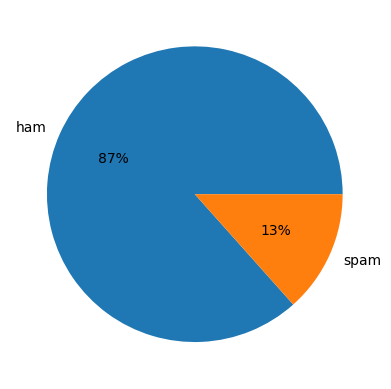

In [190]:
# EDA
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.0f%%')

In [191]:
import nltk
nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
df['num_character']=df['text'].apply(len)

In [193]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [194]:
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [195]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [196]:
df['num_sentece']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [197]:
df[df['target']==1][['num_character','num_word','num_sentece']].describe()

,num_character,num_word,num_sentece
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [198]:
df[df['target']==0][['num_character','num_word','num_sentece']].describe()

,num_character,num_word,num_sentece
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

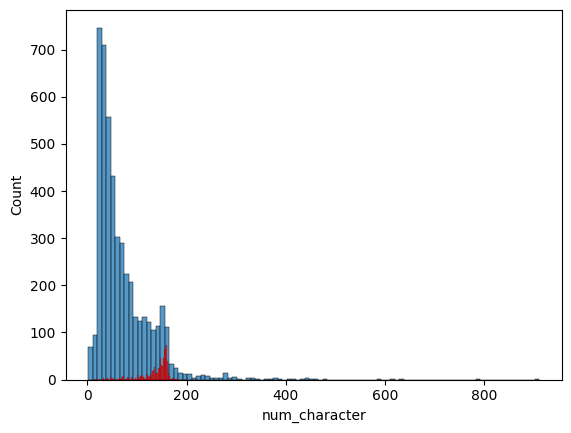

In [199]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_character'],bins=100)
sns.histplot(df[df['target']==1]['num_character'],bins=100,color='red')

<Axes: xlabel='num_word', ylabel='Count'>

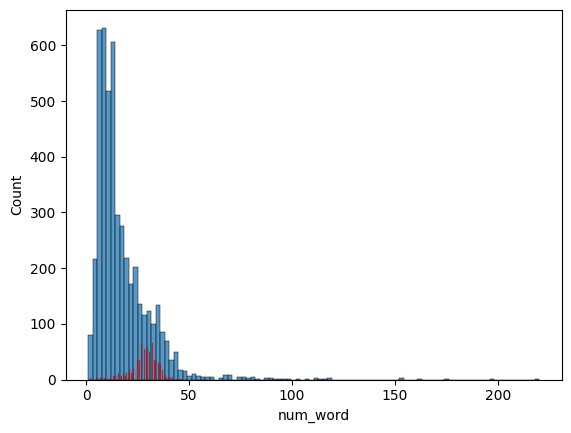

In [200]:

sns.histplot(df[df['target']==0]['num_word'],bins=100)
sns.histplot(df[df['target']==1]['num_word'],bins=100,color='red')

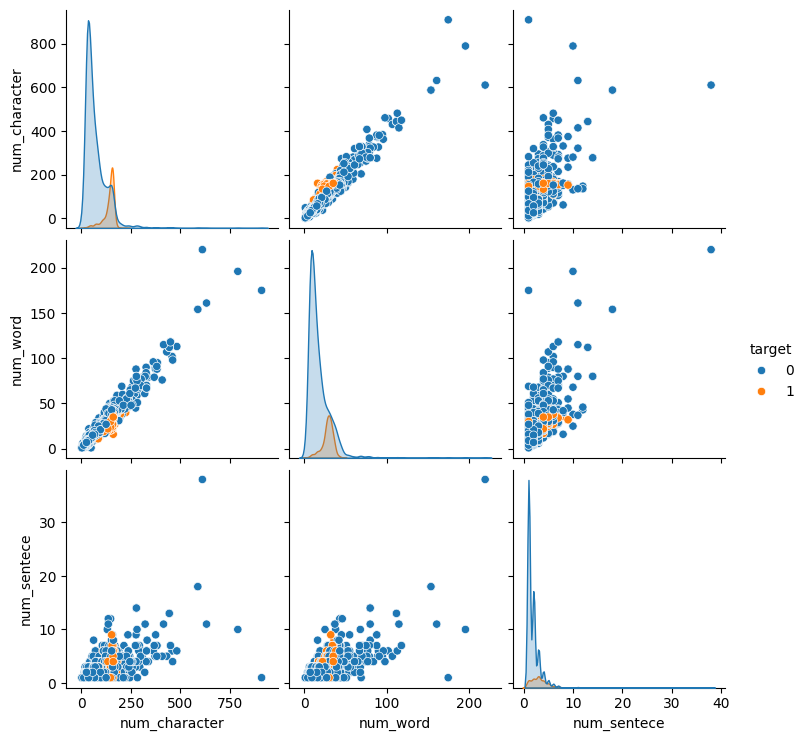

In [201]:
sns.pairplot(df,hue='target')

<Axes: >

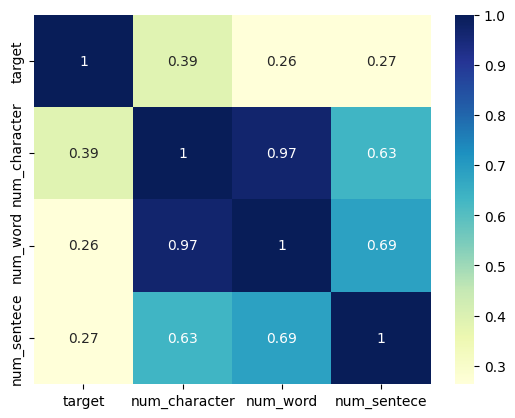

In [202]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')

In [203]:
import string


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [204]:

df['transformed_text'] = df['text'].apply(transform_text)

In [205]:
df.columns

Index(['target', 'text', 'num_character', 'num_word', 'num_sentece',
       'transformed_text'],
      dtype='object')

In [206]:
df.head()

,target,text,num_character,num_word,num_sentece,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


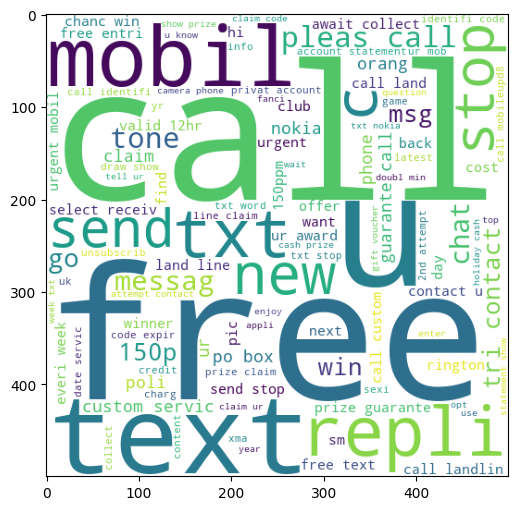

In [207]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

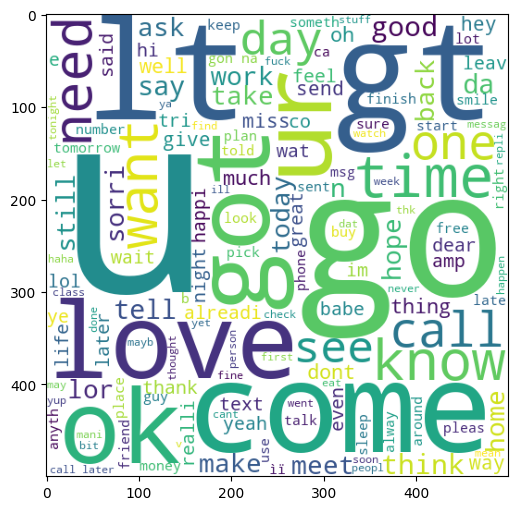

In [208]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [209]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [210]:

len(spam_corpus)

11490

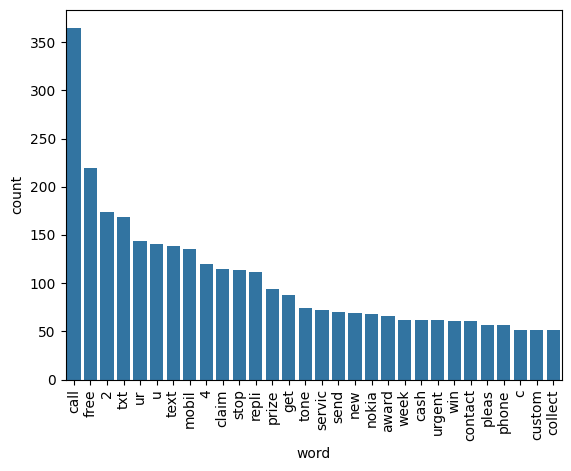

In [211]:
from collections import Counter

most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_df.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation=90)
plt.show()

In [212]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

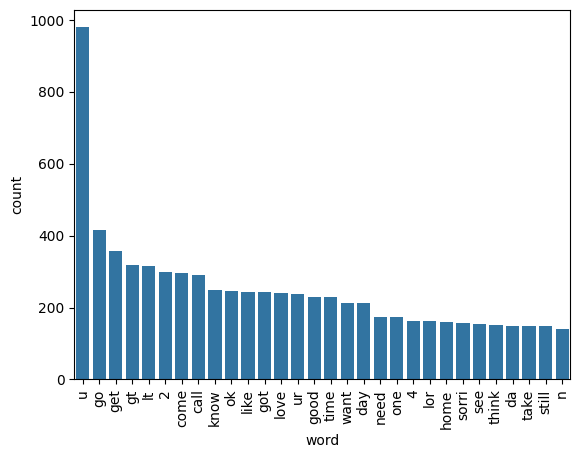

In [213]:
from collections import Counter

most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_df.columns = ['word', 'count']

# Plot
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation=90)
plt.show()

In [214]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [215]:
X1 = cv.fit_transform(df['transformed_text']).toarray()

In [216]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [217]:

y = df['target'].values

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [220]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [221]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [222]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [223]:
import pickle
pickle.dump(mnb, open("model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
